<a href="https://colab.research.google.com/github/varun-p2401/Crop-Prediction/blob/main/zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Crop Production: Exploratory Data Analysis to chart Agriculture highlights using Python

Came across this fascinating and important all emcompassing dataset on State-wise Crop Production in India at kaggle for 1997 to 2015 https://www.kaggle.com/abhinand05/crop-production-in-india.

It also gave information about different seasonal crops at district level and area of cultivation along with total crop production.India being agriculture rich country, this data will have lots of minor and major facts which will help in charting a next successful agriculture revolution after 1965. Few facts of green revolution of India taken from https://en.wikipedia.org/wiki/Green_Revolution_in_India:
"Under premiership of Congress leader Lal Bahadur Shastri, the Green Revolution within India commenced in 1965 that led to an increase in food grain production, especially in Punjab, Haryana, and Uttar Pradesh"

Doing an exploratory data analysis of this dataset would give insights into Indian agriculture status: state-wise, district-wise, crop-wise, area-wise and levels of productions. A complete analysis will paint a beautiful story of this important aspect of India.

Using some tricks and tips from "Data Analysis with Python: Zero to Pandas](zerotopandas.com)" will apply to this rich and diverse dataset to glean important and broad aspects which showcase our agriculture might and how it is natured and enhanced by scientific knowledge combined with traditional cultivation process.



## Downloading the Dataset
The Dataset was downloaded using jovian opendatasets with kaggle link in .csv format. Opendatasets is collection or repository of interesting datasets from different domains which will help Data Science enthuiast to experiment and sharpen their skills using different modelling concepts to either to classify or forecast future incoming data.


In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/abhinand05/crop-production-in-india/crop_production.csv'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: varunparthipan
Your Kaggle Key: ··········


100%|██████████| 1.96M/1.96M [00:00<00:00, 3.37MB/s]


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './crop-production-in-india'

In [ ]:
import os
os.listdir(data_dir)

['crop_production.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
crop_total = "indian-crop-production-exploratory-analysis" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project="indian-crop-production-exploratory-analysis")

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

Data preparation or Data preprocessing is very crucial step in a Data Science project pipeline. This process includes, accessing different variables and verifying the accuracy of data collected. Working on missing data(either deleting it or imputing with appropriate measures). Outliers are also datapoints which has to flagged and investigated if they are conducive for including in the analysis.

This step will clean the available data in such a way that it can be further used in the project pipeline without any hassle (reducing any biasness).



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df=pd.read_csv("./crop-production-in-india/crop_production.csv")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


**Dimensions of the dataset is 246091 rows and 7 columns**

In [ ]:
df.shape

(246091, 7)

Out of seven variables, we have four categorical variables(State_Name,District_Name, Season and Crop type) and three continuous variables in float(Area and Production) and integer(Crop_Year) format.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


**Checking for Missing Data**

In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
3730/246091

0.015156994770227274

Checking for missing values showed Production variable showing huge number of missing values amounting to 3730 values and no missing values for other variables. Next step would be dropping these samples as we have sufficiently big dataset. Missing value accounts for only 1.5% of total sample size.

In [ ]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [ ]:
df.shape

(242361, 7)

By dropping missing values in Production variable we ended up with 242361 sample size.

In [ ]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

**Checking for Correlation between variables**

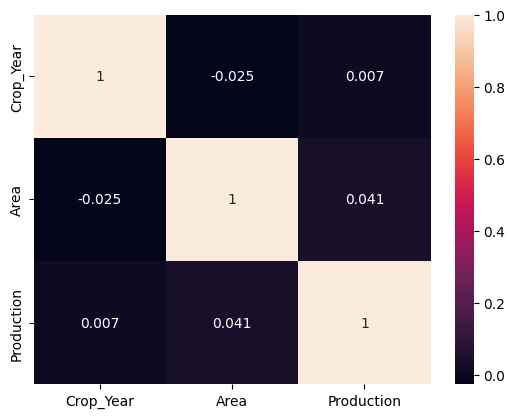

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True);

* There is no variable showing high correlation with any other variable in the dataset.

## **Variable Analysis**

**State Variable**

In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
df.State_Name.nunique()

33

This dataset encodes agriculture data for 33 Indian states (including Union Territory).
DataFrame.value_counts() helps to see the quantum of levels present. As seen below, we have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnatake than other states.

In [ ]:
df.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

**District Variable**

In [ ]:
df.District_Name.nunique()

646

* For 33 Indain states on further dissecting we get data for 646 different districts.

In [ ]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [ ]:
df.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

On District front, we have have more data coming from Tumkur, Belgaum, Hassan, Bellary and Bijapur from Karantaka state.

**Crop Year Variable**

Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007-08 and 2006.

In [ ]:
print(df.Crop_Year.nunique())
print(df.Crop_Year.min())
print(df.Crop_Year.max())
print(df.Crop_Year.value_counts())

19
1997
2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


**Season Variable**

Dataset talks of six different seasons i.e. Kharif, Annual, Autumn, Rabi, Summer and Winter crops with more crops yielding in Winter. Frequency wise, we have more datapoints from Kharif, Rabi and Annual crop types.

Little information about different crops types:
The kharif cropping season is from July –October during the south-west monsoon and the Rabi cropping season is from October-March (winter). The crops grown between March and June are summer crops. Crops in India are dependent on Monsoon water. There will be variation in crop production from one year to another.

In [ ]:
print(df.Season.nunique())
print(df.Season.unique())
print(df.Season.max())
print(df.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


Dataset shows data for 124 different crop varieties. On doing df.value_counts(), we can show top crops are Rice(15082),Maize(13787) and Moong(Green Gram, 10106).

In [ ]:
print(df.Crop.nunique())
print(df.Crop.unique())
print(df.Crop.max())
print(df.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

**Area Variable:** Area under cultivation

We have proption of area under cultibvation for different area. Production depends on the proption of area allocated for cultivation.

In [ ]:
print(df.Area.nunique())
print(df.Area.max())
print(df.Area.value_counts().head(10))
print(df.Area.value_counts().tail(10))

38391
8580100.0
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: Area, dtype: int64
63107.0     1
13655.0     1
95399.0     1
71644.0     1
17459.0     1
25569.0     1
19349.0     1
90302.0     1
39698.0     1
279151.0    1
Name: Area, dtype: int64


**Production Variable**


Production values range from 0 to 1250800000

In [ ]:
df.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [ ]:
df.Production.max()

1250800000.0

In [ ]:
df.Production.value_counts(ascending = False)

1.000000e+00    4028
0.000000e+00    3523
1.000000e+02    3521
2.000000e+00    2964
3.000000e+00    2311
                ... 
2.120000e+08       1
1.070000e+00       1
2.293410e+05       1
1.870600e+04       1
5.978990e+05       1
Name: Production, Length: 51627, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


Looking at distribution of Area and Production variables. These two variables are highly skewed with lot of outliers.

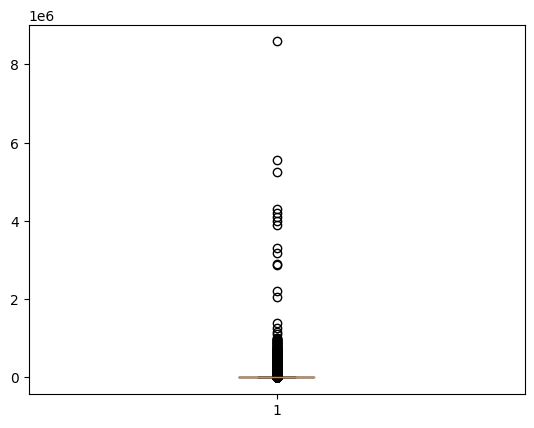

In [ ]:
plt.boxplot(df.Area);

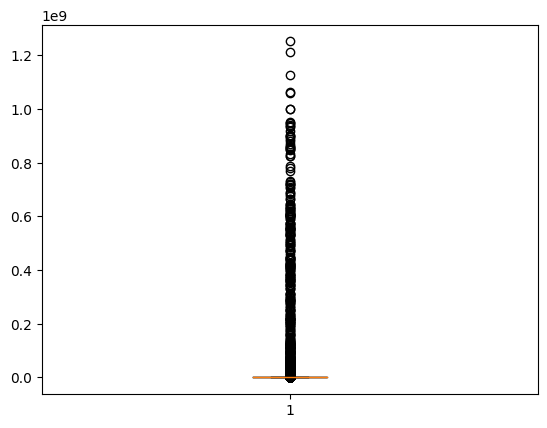

In [ ]:
plt.boxplot(df.Production);

**Bivarate Analysis**

In [ ]:
Prod = df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

<ipython-input-41-b30c6e812fa8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prod = df.groupby(by = df.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


In [ ]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [ ]:
df["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

In [ ]:
df.head(50)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00,Nuts
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00,None
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.00,100.00,spices
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,2.00,Commercial
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.00,15.00,Vegetables
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.00,169.00,Vegetables


In [ ]:
le=LabelEncoder()
df.cat_crop= le.fit_transform(df.cat_crop)
df.Season = le.fit_transform(df.Season)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['cat_crop']])
df['cat_crop'] = scaler.transform(df[['cat_crop']])

scaler.fit(df[['Season']])
df['Season'] = scaler.transform(df[['Season']])


In [ ]:
km =KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Season','cat_crop']])
y_predicted
df.head()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,0.2,Arecanut,1254.0,2000.0,0.4
1,Andaman and Nicobar Islands,NICOBARS,2000,0.2,Other Kharif pulses,2.0,1.0,0.5
2,Andaman and Nicobar Islands,NICOBARS,2000,0.2,Rice,102.0,321.0,0.1
3,Andaman and Nicobar Islands,NICOBARS,2000,0.8,Banana,176.0,641.0,0.3
4,Andaman and Nicobar Islands,NICOBARS,2000,0.8,Cashewnut,720.0,165.0,0.4


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


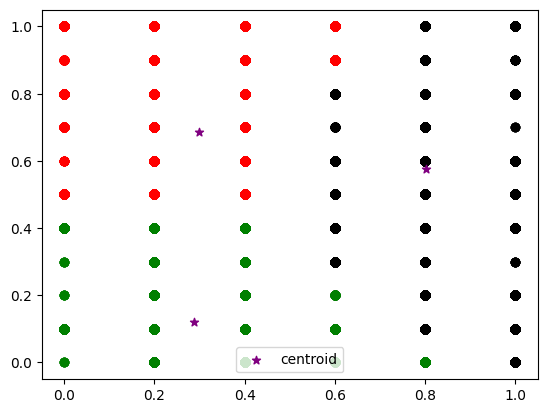

In [ ]:
df['cluster']=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Season,df1['cat_crop'],color='green')
plt.scatter(df2.Season,df2['cat_crop'],color='red')
plt.scatter(df3.Season,df3['cat_crop'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Season','cat_crop']])
    sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

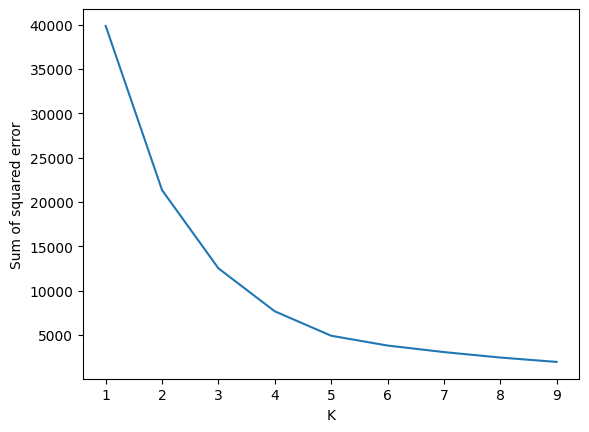

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)